<a href="https://colab.research.google.com/github/ozhao1323/ECON3916-Statistical-and-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2026': 63000},
    {'Item': 'Housing (Double)', 'Price_2016': 4200, 'Price_2026': 6500},
    {'Item': 'Starbucks Coffee', 'Price_2016': 1.95, 'Price_2026': 4.65},
    {'Item': 'Instant Noodles', 'Price_2016': 0.70, 'Price_2026': 1.20}
]

def calculate_inflation(base, current):
    return ((current - base) / base) * 100

for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2026'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 40.00% Inflation
Housing (Double): 54.76% Inflation
Starbucks Coffee: 138.46% Inflation
Instant Noodles: 71.43% Inflation


In [5]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='8113cdc4e493b053702c8f7760eecb25')

official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
housing = fred.get_series('CUSR0000SEHA')
coffee = fred.get_series('CUSR0000SEFV')
noodles = fred.get_series('CUSR0000SEFV')

start_date = '2016-01-01'
end_date = official_cpi.index[-1]

def calculate_value_index(series, start_date, end_date):
    value_at_start = series[start_date]
    value_current = series[end_date]
    return (value_current / value_at_start) * 100

for item in student_basket:
    item_name = item['Item']

    if item_name == 'Tuition':
        series = tuition
    elif item_name == 'Housing (Double)':
        series = housing
    elif item_name == 'Starbucks Coffee':
        series = coffee
    elif item_name == 'Instant Noodles':
        series = noodles

    value_index = calculate_value_index(series, start_date, end_date)

    print(f"{item_name}: {value_index:.2f} Value Index")

Tuition: 129.06 Value Index
Housing (Double): 150.85 Value Index
Starbucks Coffee: 149.98 Value Index
Instant Noodles: 149.98 Value Index


In [6]:
student_basket

[{'Item': 'Tuition', 'Price_2016': 45000, 'Price_2026': 63000},
 {'Item': 'Housing (Double)', 'Price_2016': 4200, 'Price_2026': 6500},
 {'Item': 'Starbucks Coffee', 'Price_2016': 1.95, 'Price_2026': 4.65},
 {'Item': 'Instant Noodles', 'Price_2016': 0.7, 'Price_2026': 1.2}]

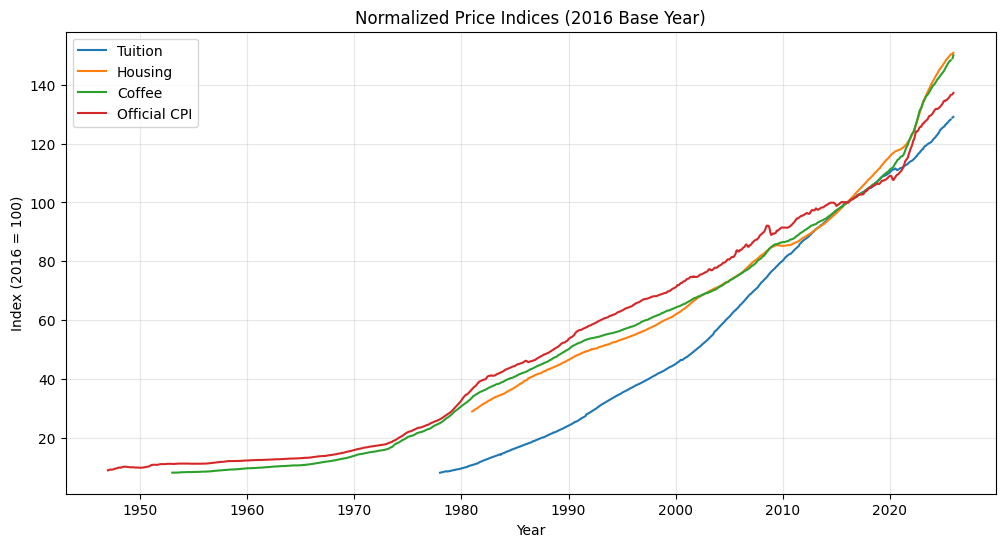

In [8]:
import matplotlib.pyplot as plt

def normalize_series(series, base_date='2016-01-01'):
    base_value = series.asof(base_date)
    return (series / base_value) * 100

tuition_norm = normalize_series(tuition)
housing_norm = normalize_series(housing)
coffee_norm = normalize_series(coffee)
cpi_norm = normalize_series(official_cpi)

plt.figure(figsize=(12, 6))
plt.plot(tuition_norm, label='Tuition')
plt.plot(housing_norm, label='Housing')
plt.plot(coffee_norm, label='Coffee')
plt.plot(cpi_norm, label='Official CPI')
plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.title('Normalized Price Indices (2016 Base Year)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

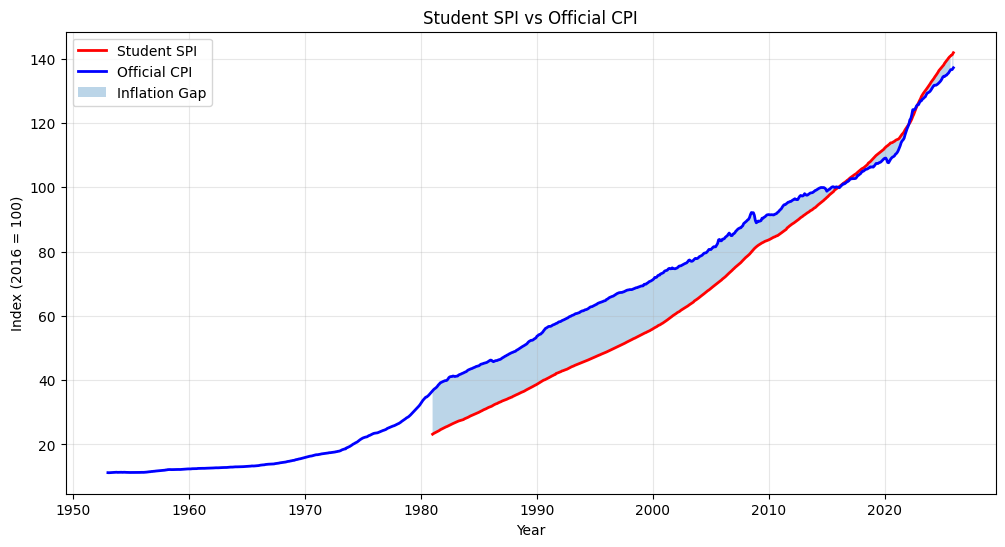

In [11]:
weights = {
    'Tuition': 0.4,
    'Housing': 0.3,
    'Coffee': 0.15,
    'Noodles': 0.15
}

noodles_norm = normalize_series(noodles)

student_spi = (weights['Tuition'] * tuition_norm +
               weights['Housing'] * housing_norm +
               weights['Coffee'] * coffee_norm +
               weights['Noodles'] * noodles_norm)

common_dates = student_spi.index.intersection(cpi_norm.index)
student_spi_aligned = student_spi[common_dates]
cpi_norm_aligned = cpi_norm[common_dates]

plt.figure(figsize=(12, 6))
plt.plot(student_spi_aligned, label='Student SPI', linewidth=2, color='red')
plt.plot(cpi_norm_aligned, label='Official CPI', linewidth=2, color='blue')
plt.fill_between(student_spi_aligned.index, student_spi_aligned, cpi_norm_aligned,
                 alpha=0.3, label='Inflation Gap')
plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.title('Student SPI vs Official CPI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

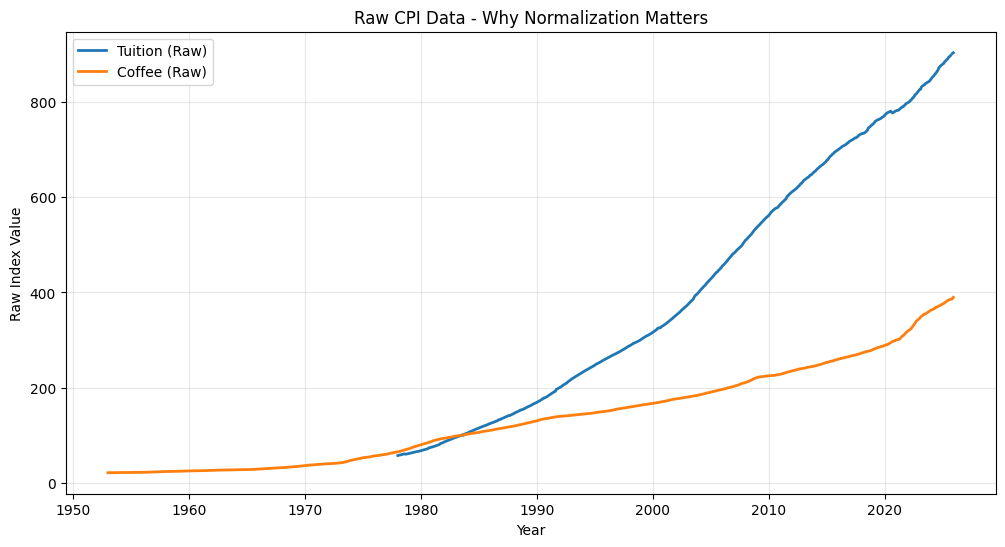

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(tuition, label='Tuition (Raw)', linewidth=2)
plt.plot(coffee, label='Coffee (Raw)', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Raw Index Value')
plt.title('Raw CPI Data, Why Normalization Matters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

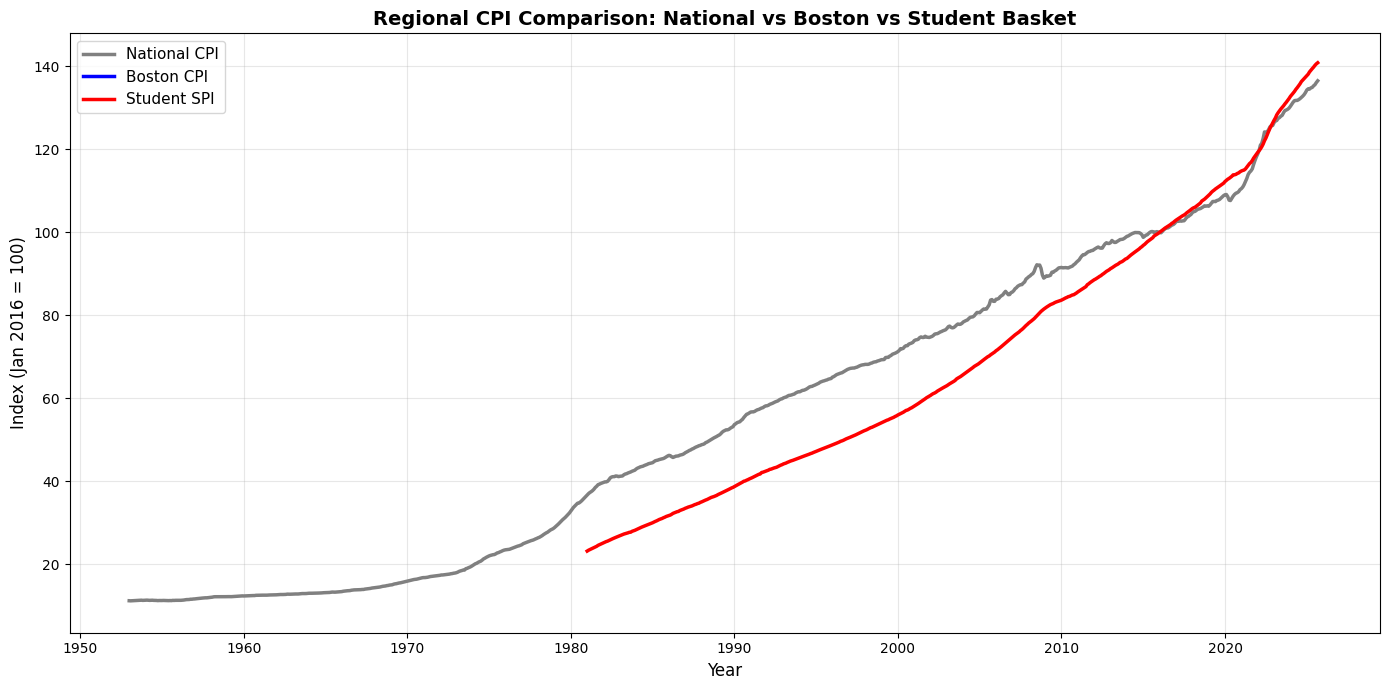

In [13]:
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (using your existing key)
fred = Fred(api_key='8113cdc4e493b053702c8f7760eecb25')

# Fetch Boston CPI data
# FRED code: CUURA103SA0 (Consumer Price Index for All Urban Consumers: All Items in Boston-Cambridge-Newton)
boston_cpi = fred.get_series('CUURA103SA0')

# Normalize Boston CPI to Jan 1, 2016 = 100
def normalize_series(series, base_date='2016-01-01'):
    base_value = series.asof(base_date)
    return (series / base_value) * 100

boston_cpi_norm = normalize_series(boston_cpi)

# Align all three series to common dates
common_dates = cpi_norm.index.intersection(boston_cpi_norm.index).intersection(student_spi.index)
national_cpi_aligned = cpi_norm[common_dates]
boston_cpi_aligned = boston_cpi_norm[common_dates]
student_spi_aligned = student_spi[common_dates]

# Plot all three lines
plt.figure(figsize=(14, 7))
plt.plot(national_cpi_aligned, label='National CPI', linewidth=2.5, color='grey')
plt.plot(boston_cpi_aligned, label='Boston CPI', linewidth=2.5, color='blue')
plt.plot(student_spi_aligned, label='Student SPI', linewidth=2.5, color='red')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (Jan 2016 = 100)', fontsize=12)
plt.title('Regional CPI Comparison: National vs Boston vs Student Basket', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()